### Data visualization

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [26]:
import seaborn as sns

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("tab20b")

palette='tab20b'
title_fontsize = '25'

In [27]:
image_folder_path = '../images/aculei-images/'

In [28]:
df = pd.read_csv('../aculei.csv', index_col=0)
df['camera'].isnull().sum()

4452

In [29]:
# sorting a lil bit
df.sort_values('date', inplace=True)
df.sort_values('camera', inplace=True)

In [30]:
# modifying date_time column dtype
df['date_time'] = pd.to_datetime(df['date_time'])

### Some insigths about the data

In [31]:
df.shape

(16874, 6)

In [32]:
df.sample(5)

,image_name,camera,date_time,date,time,moon
16556,TF_ACULEI_15083_DSCF0156.jpg,NaN,2023-03-18 00:56:30,2023-03-18,00:56:30,Waning Crescent
12110,TF_ACULEI_111_DSCF0282.jpg,NaN,2021-01-25 02:08:02,2021-01-25,02:08:02,Waxing Gibbous
13,TF_ACULEI_10091_DSCF0552.jpg,CAM_1,2021-12-15 02:40:13,2021-12-15,02:40:13,Waxing Gibbous
3006,TF_ACULEI_3350_DSCF3568.jpg,CAM_1,2021-06-15 01:41:11,2021-06-15,01:41:11,Waxing Crescent
1477,TF_ACULEI_7708_DSCF0022.jpg,CAM_2,2021-07-12 22:31:14,2021-07-12,22:31:14,Waxing Crescent


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 16660 to 16647
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   image_name  16874 non-null  object        
 1   camera      12422 non-null  object        
 2   date_time   16771 non-null  datetime64[ns]
 3   date        16771 non-null  object        
 4   time        16771 non-null  object        
 5   moon        16771 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 922.8+ KB


In [34]:
print('Null values\n')
print(df.isnull().sum())

Null values

image_name       0
camera        4452
date_time      103
date           103
time           103
moon           103
dtype: int64


In [35]:
print('Unique cameras\n')
print(df['camera'].value_counts())

Unique cameras

CAM_1    9076
CAM_4    1047
CAM_3     995
CAM_5     671
CAM_6     247
CAM_7     198
CAM_2     188
Name: camera, dtype: int64


In [36]:
print('Time period\n')

min = df['date_time'].min()
max = df['date_time'].max()

print(f'Min date: {min}\nMax date: {max}')

Time period

Min date: 2021-01-03 22:21:33
Max date: 2023-09-28 01:00:12


In [37]:
print('Moon phases recorded\n')
print(df['moon'].value_counts())

Moon phases recorded

Full Moon          2698
First Quarter      2609
Waxing Gibbous     2113
Waning Crescent    2049
Waning Gibbous     2039
Last Quarter       1861
New Moon           1755
Waxing Crescent    1647
Name: moon, dtype: int64


### Data visualization

In [38]:
# adding info to plot easier
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.to_period('Y')
df['day'] = df['date'].dt.to_period('d')

In [39]:
df.head()

,image_name,camera,date_time,date,time,moon,month,year,day
16660,TF_ACULEI_146_DSCF0012.jpg,CAM_1,2021-02-08 22:58:41,2021-02-08,22:58:41,Waning Crescent,2021-02,2021,2021-02-08
16157,TF_ACULEI_6212_DSCF6555.jpg,CAM_1,2021-06-25 00:29:29,2021-06-25,00:29:29,Full Moon,2021-06,2021,2021-06-25
1325,TF_ACULEI_6309_DSCF6652.jpg,CAM_1,2021-06-25 00:50:13,2021-06-25,00:50:13,Full Moon,2021-06,2021,2021-06-25
10485,TF_ACULEI_6182_DSCF6525.jpg,CAM_1,2021-06-25 00:20:26,2021-06-25,00:20:26,Full Moon,2021-06,2021,2021-06-25
8110,TF_ACULEI_6219_DSCF6562.jpg,CAM_1,2021-06-25 00:31:02,2021-06-25,00:31:02,Full Moon,2021-06,2021,2021-06-25


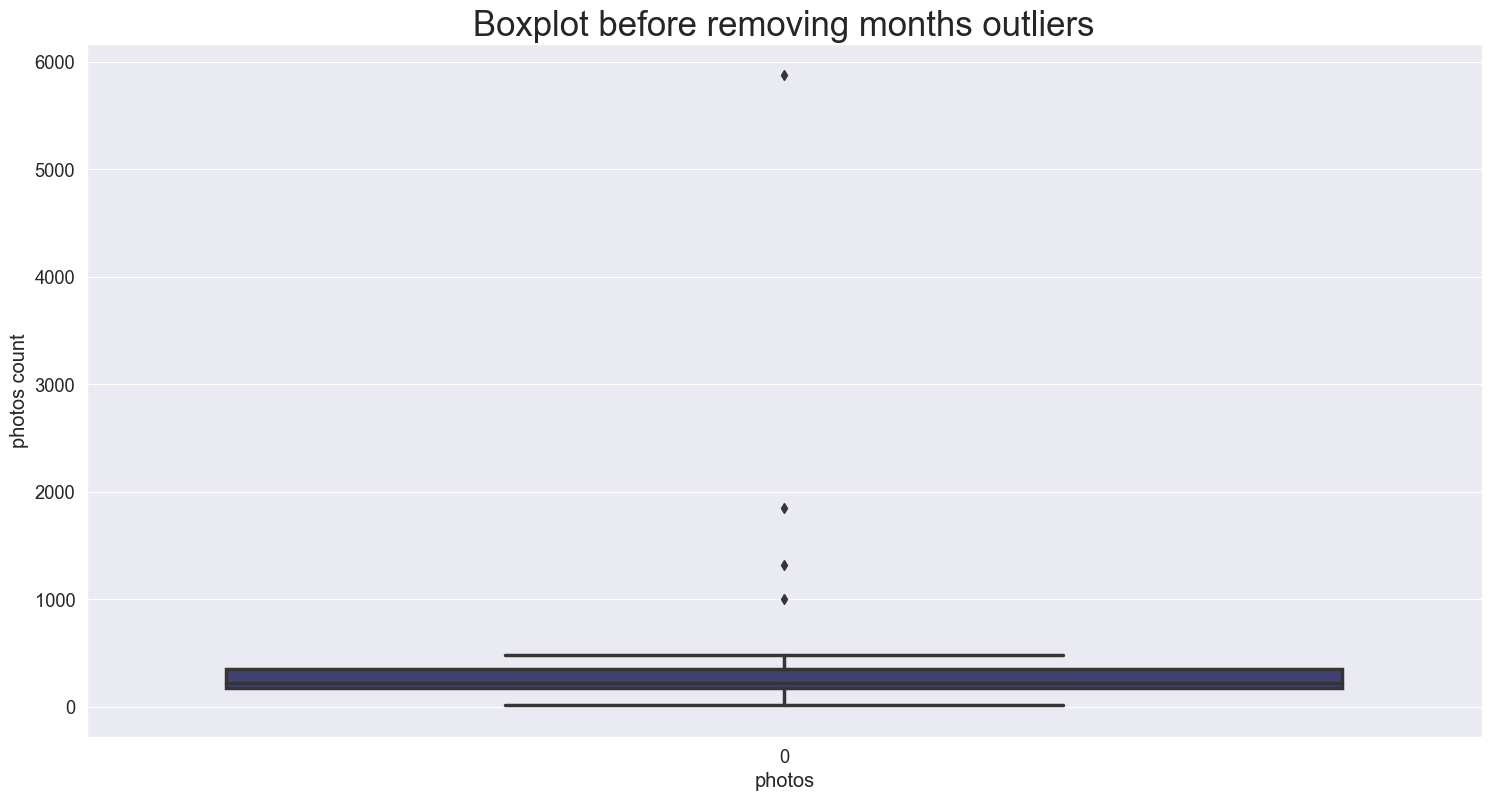

In [40]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'])
plt.title('Boxplot before removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

In [41]:
# remove outliers ? 
df = df[df['month'] != '2021-06'].copy()
df = df[df['month'] != '2021-05'].copy()
df = df[df['month'] != '2021-07'].copy()
df = df[df['month'] != '2023-01'].copy()

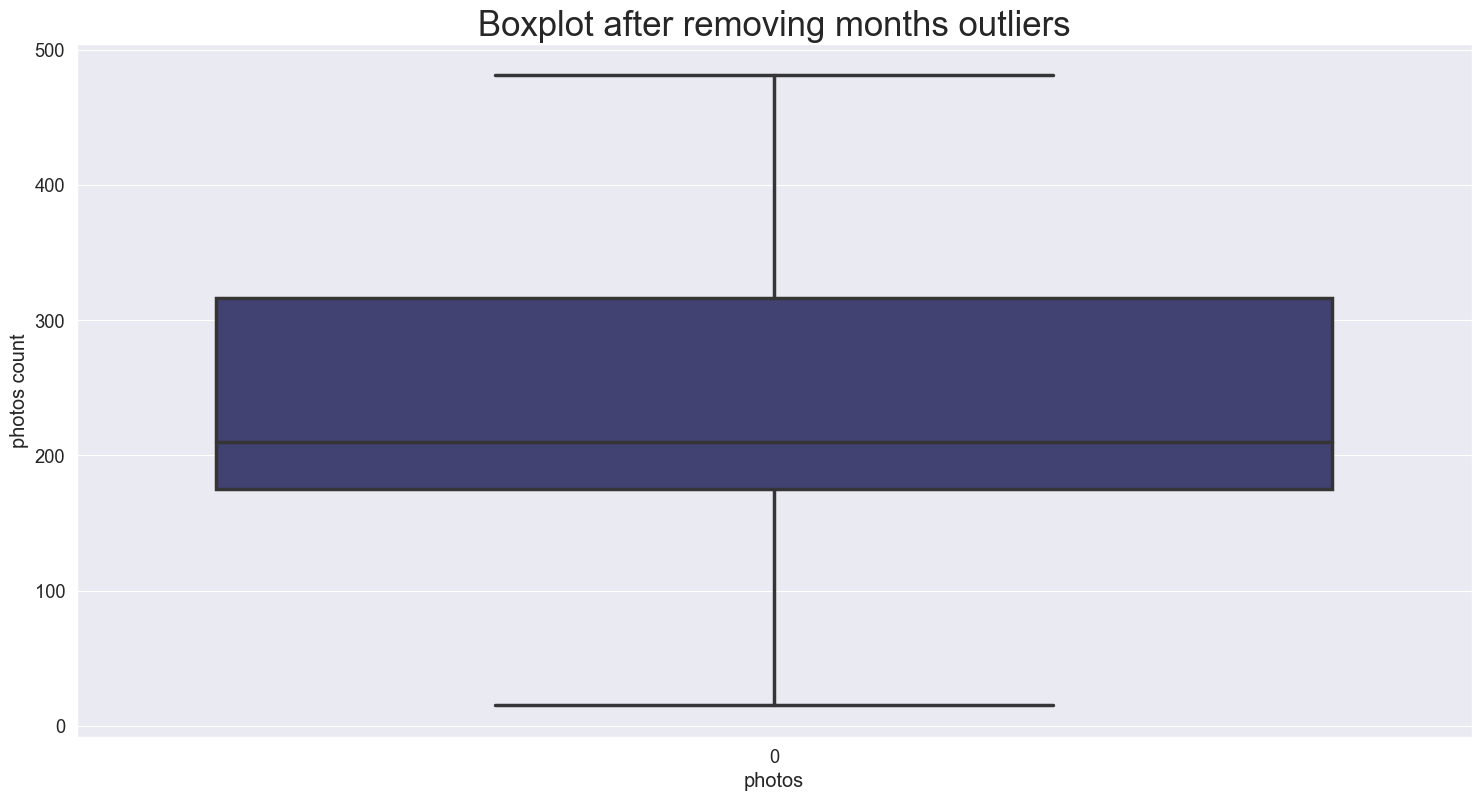

In [42]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'])
plt.title('Boxplot after removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

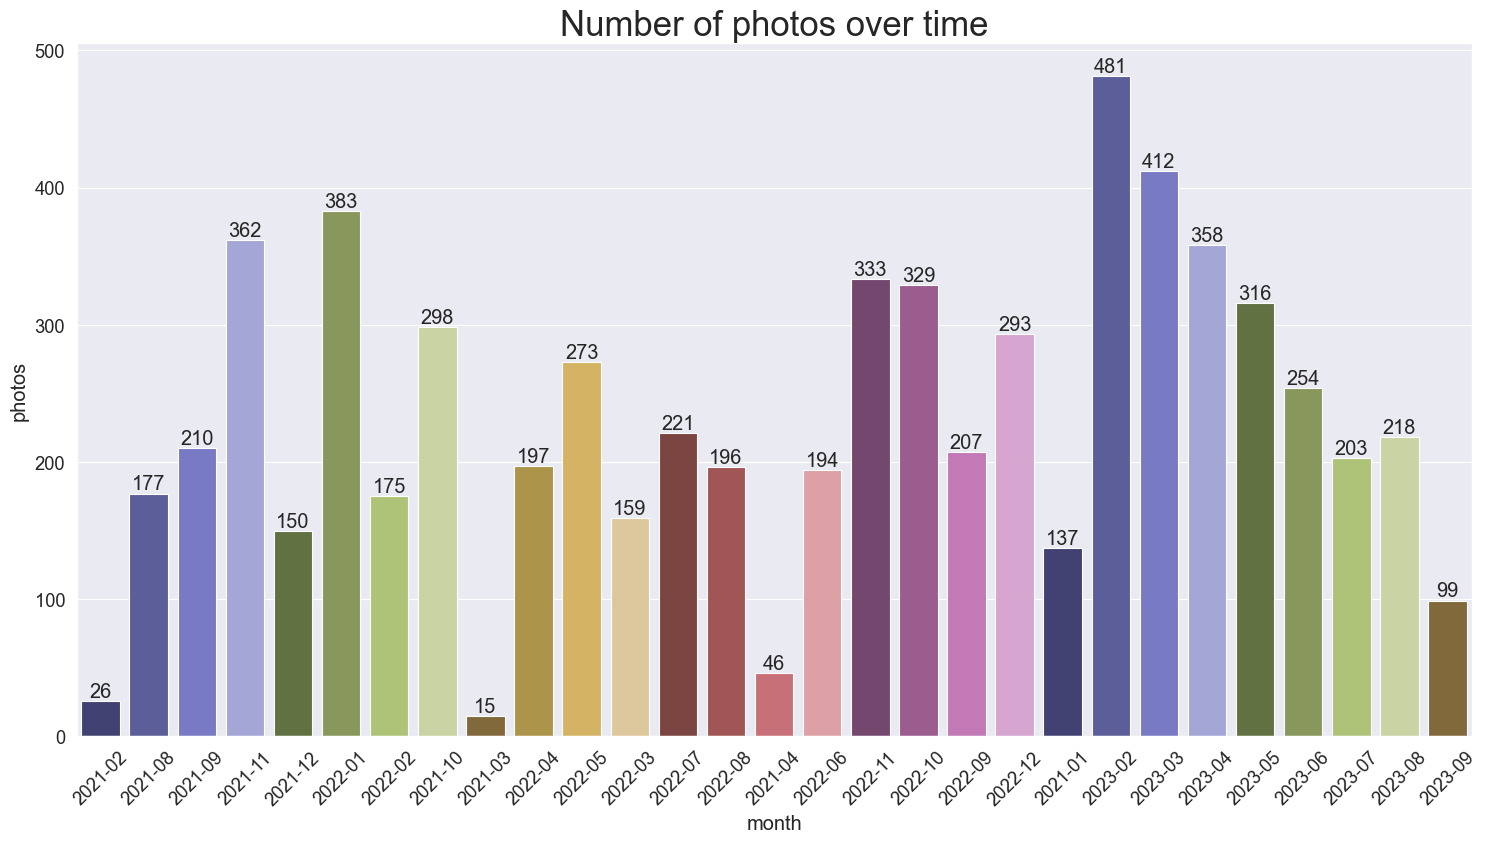

In [43]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='month', palette=palette)

plt.title('Number of photos over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

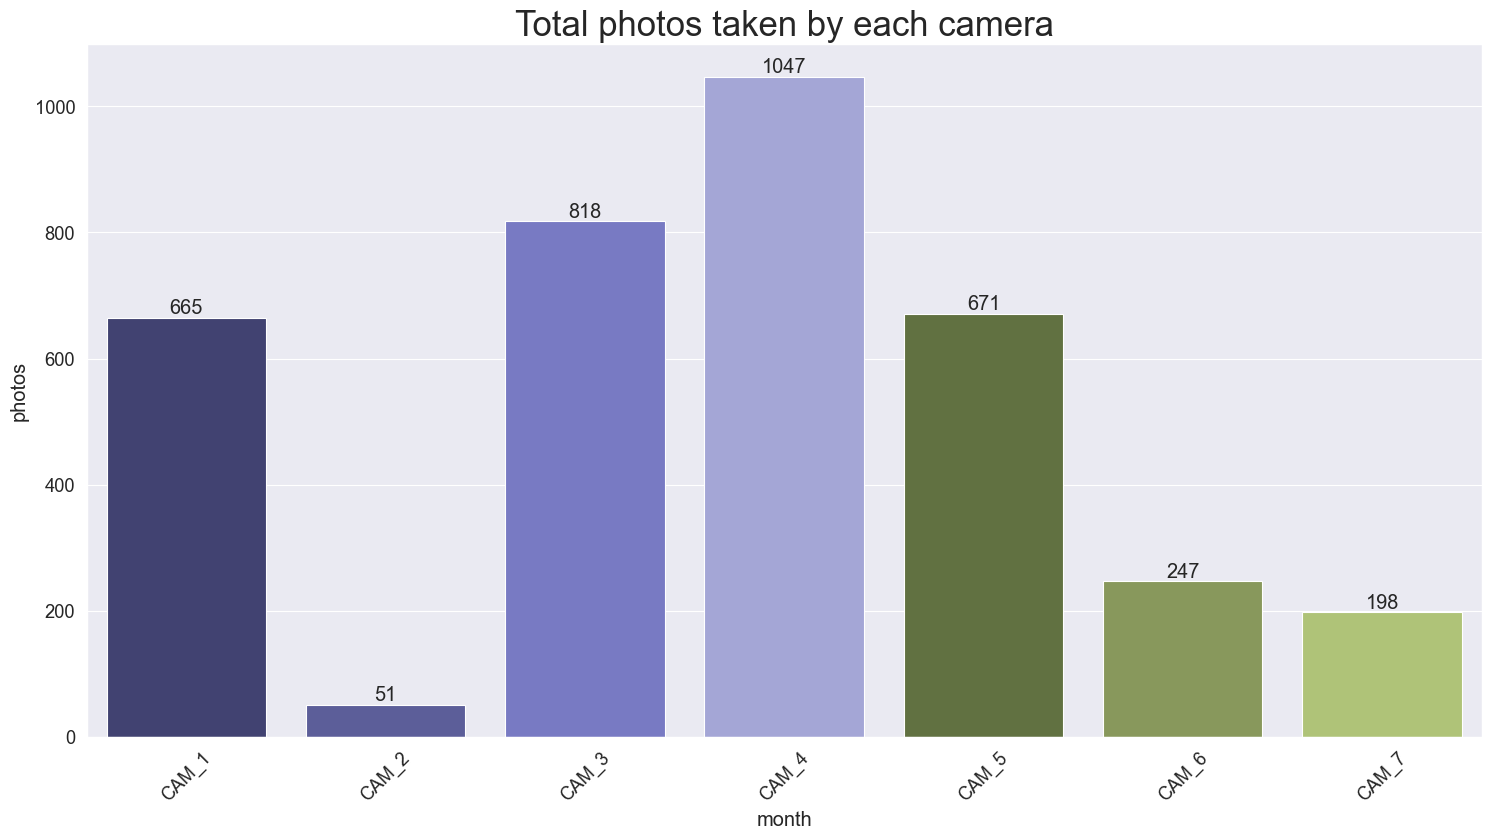

In [44]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='camera')

plt.title('Total photos taken by each camera', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

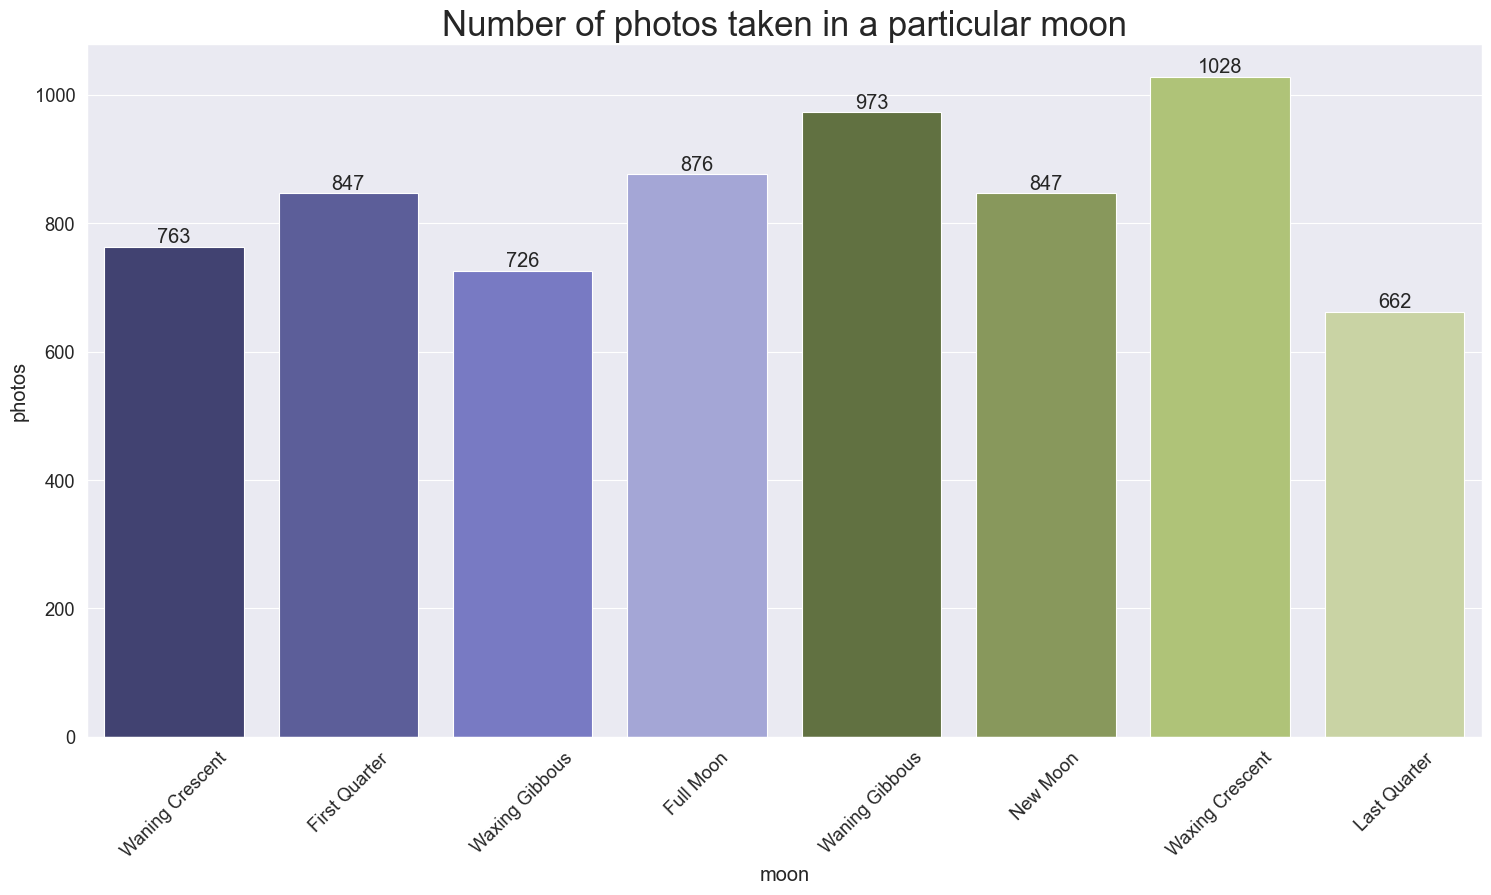

In [45]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='moon')

plt.title('Number of photos taken in a particular moon', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

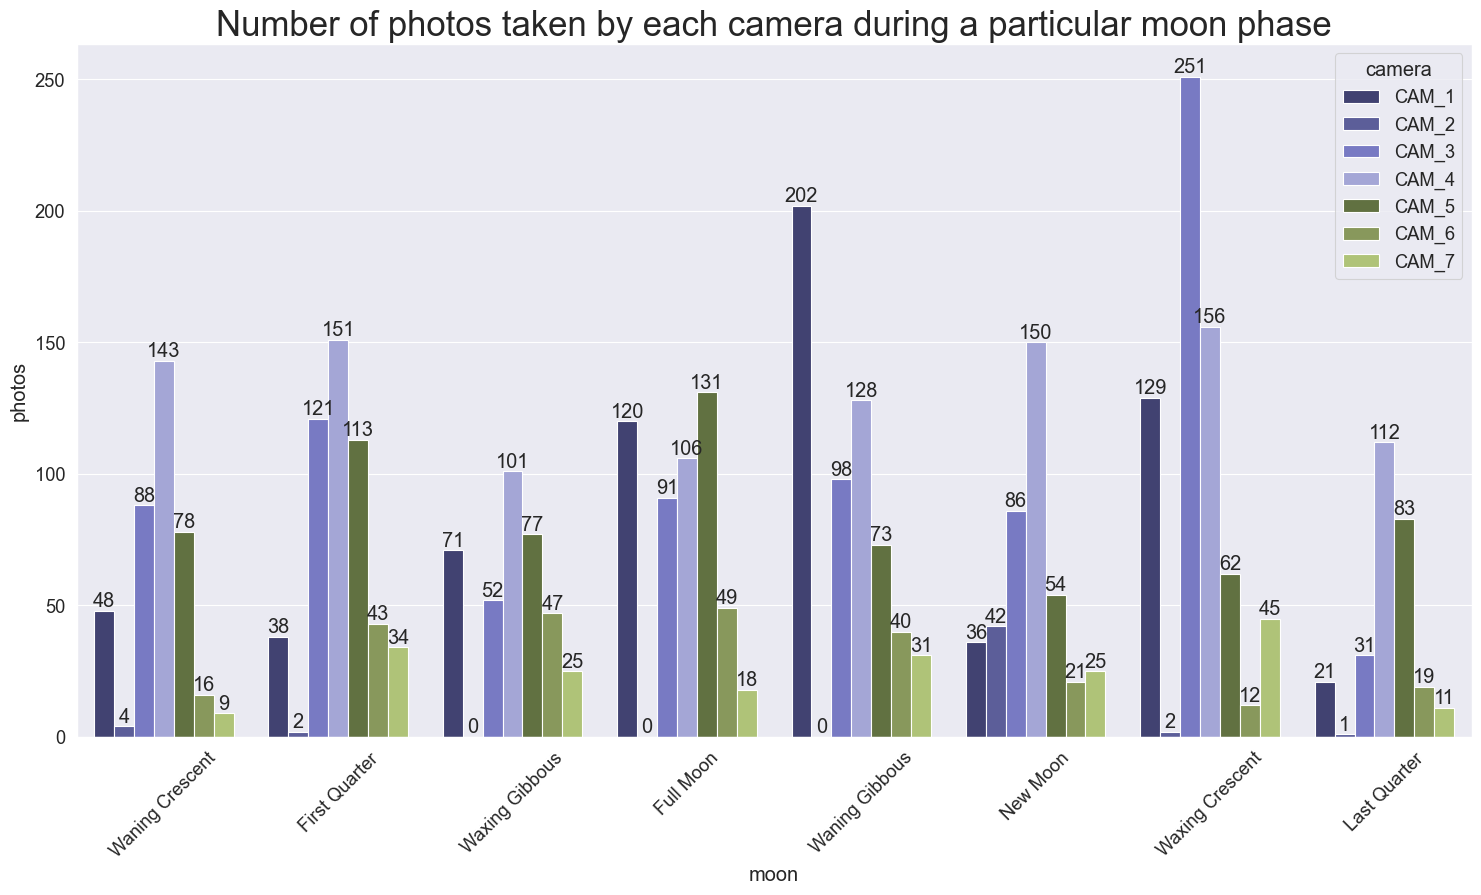

In [46]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', hue='camera')

plt.title('Number of photos taken by each camera during a particular moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

for i in range(0, 7):
    ax.bar_label(ax.containers[i])

plt.show()

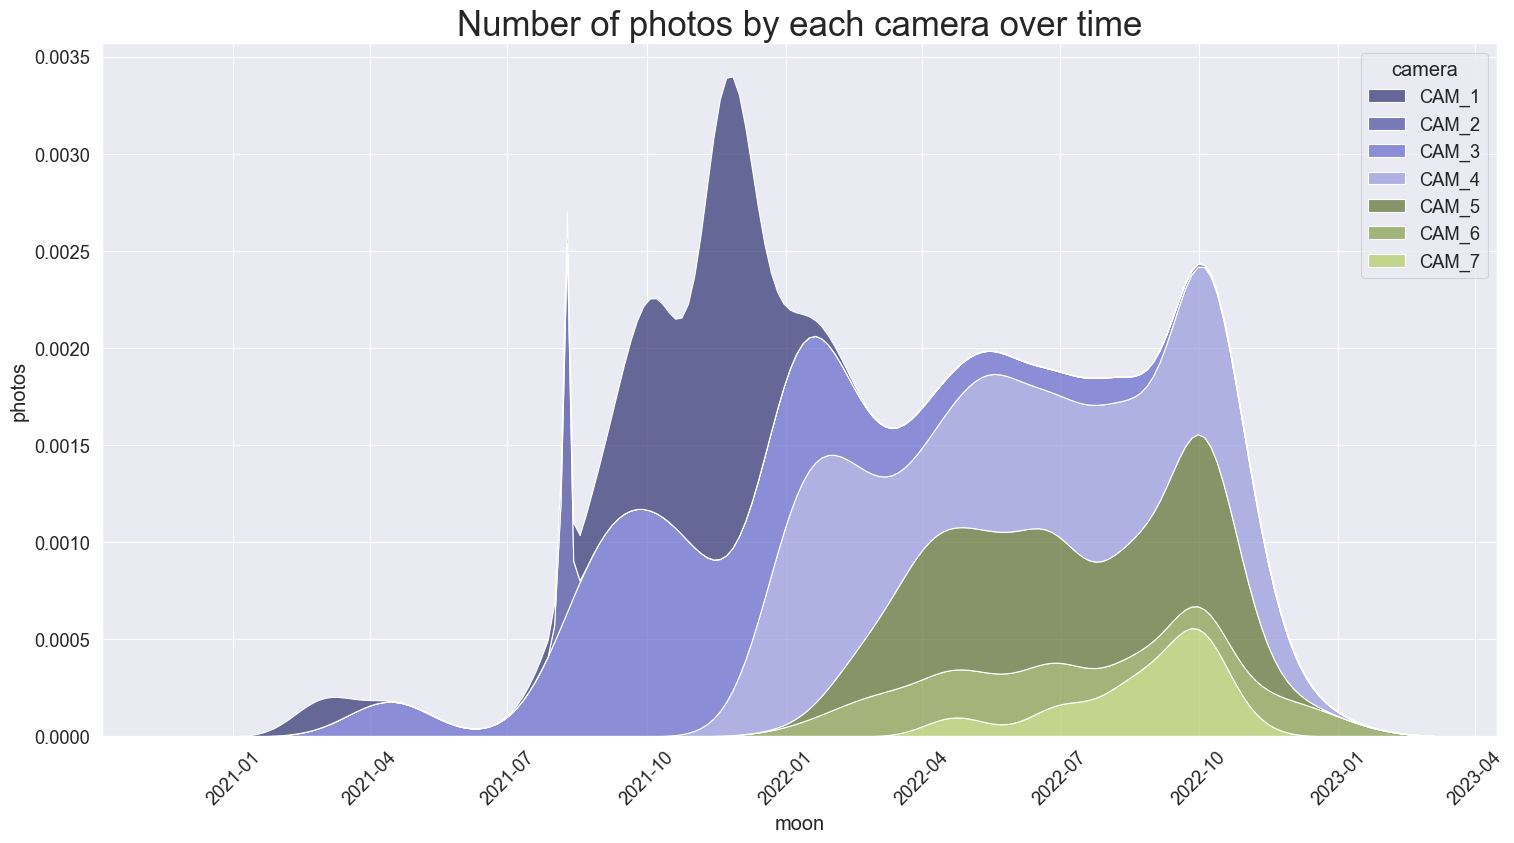

In [47]:
plt.figure(figsize=(18, 9))
sns.kdeplot(data=df, x="date_time", hue="camera", multiple="stack")

plt.title('Number of photos by each camera over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

plt.show()


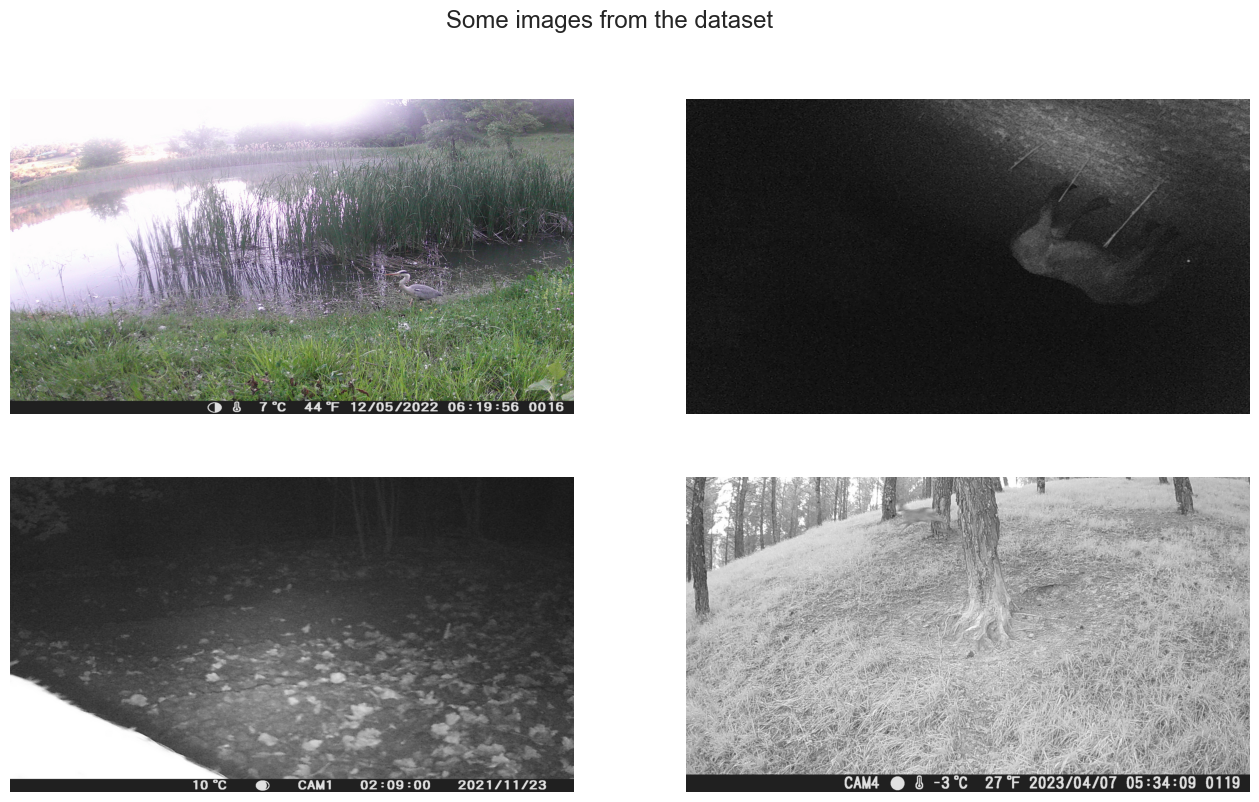

In [48]:
import random

four_random_images = df['image_name'].sample(n=4, random_state=random.seed()).tolist()
paths = [os.path.join(image_folder_path, image) for image in four_random_images]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 9))
fig.suptitle('Some images from the dataset')

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    image = Image.open(paths[i])
    ax.imshow(image, aspect='auto')
    ax.axis('off')

plt.show()